In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/education-economy-data.csv')
df.head(5)

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


Country                         0
Literacy Rate                   0
Physician Density               0
GDP (Current USD)               0
GDP Growth (% Annual)           0
GDP per Capita (Current USD)    0
GDP per Capita Category         0
Unemployment Rate (%)           0
Continent                       0
dtype: int64


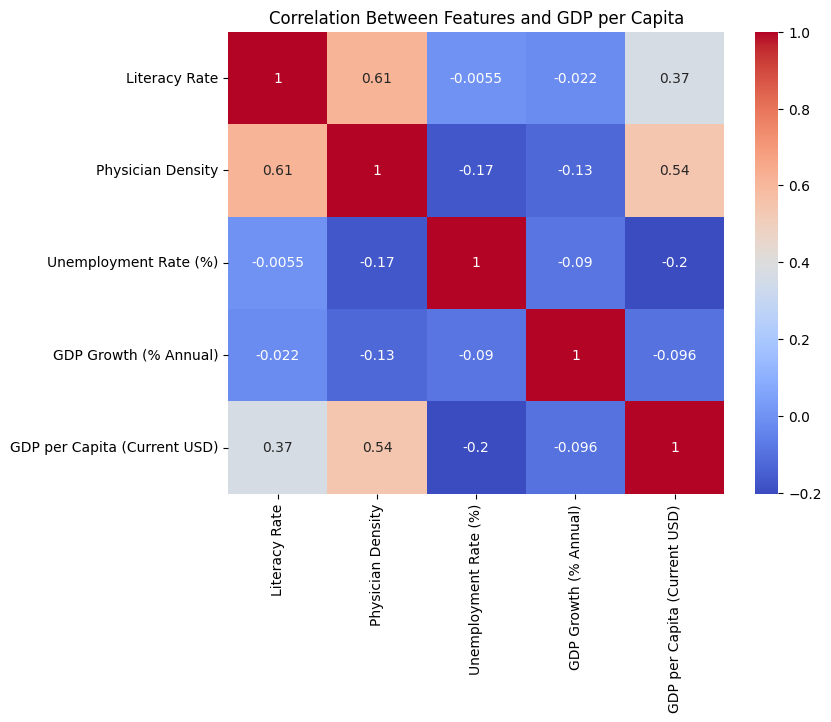

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.isnull().sum())
# Basic descriptive stats
df.describe()
features = ['Literacy Rate', 'Physician Density', 'Unemployment Rate (%)', 'GDP Growth (% Annual)']
target = 'GDP per Capita (Current USD)'

X = df[features]
y = df[target]

# correlation overview
plt.figure(figsize=(8,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features and GDP per Capita")
plt.show()

In [4]:
# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 152
Testing samples: 39


In [5]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Intercept
print("\nIntercept:", model.intercept_)


                        Coefficient
Literacy Rate             16.454993
Physician Density      10001.090221
Unemployment Rate (%)   -403.517894
GDP Growth (% Annual)   -204.750729

Intercept: 1586.5303031089534


In [6]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.124
MAE: 18251.09
RMSE: 33976.43


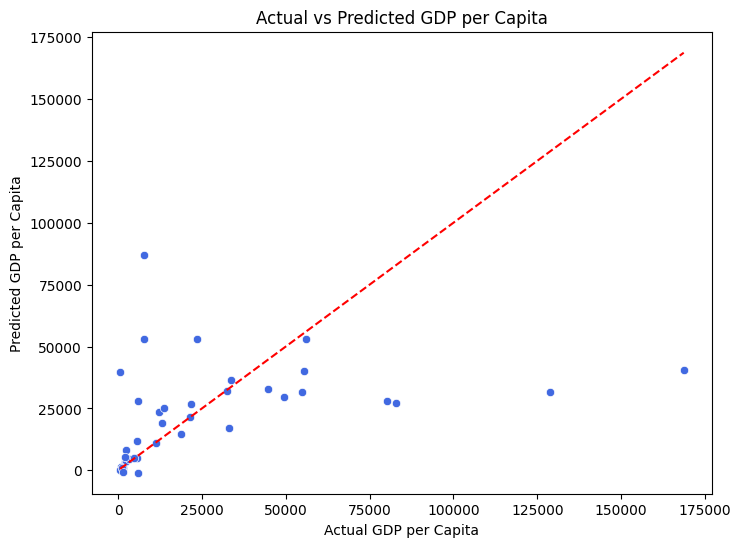

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.xlabel("Actual GDP per Capita")
plt.ylabel("Predicted GDP per Capita")
plt.title("Actual vs Predicted GDP per Capita")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


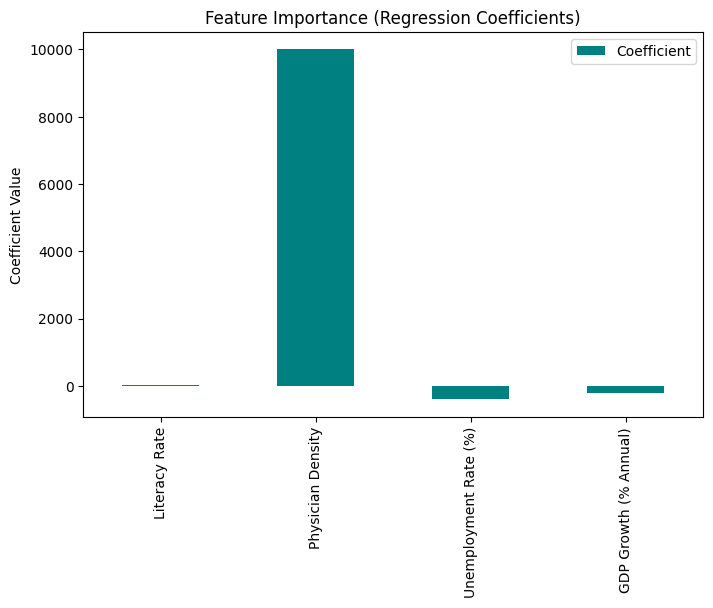

In [8]:
coeff_df.plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Feature Importance (Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()
